In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
train = pd.read_csv("train (2)-Copy1.csv")
train_test = [train]

In [3]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


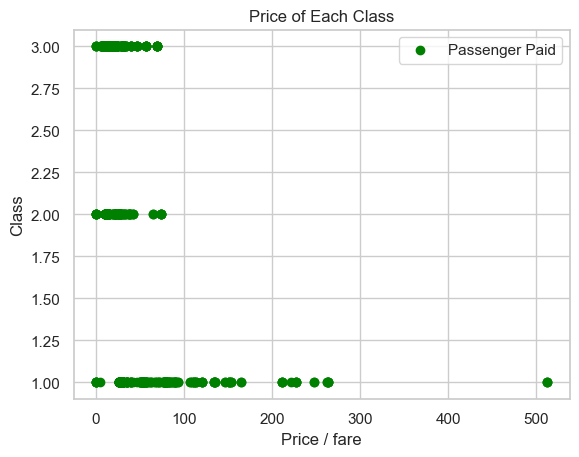

In [56]:
plt.scatter(train['Fare'],train['Pclass'],color = 'green', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

<AxesSubplot:>

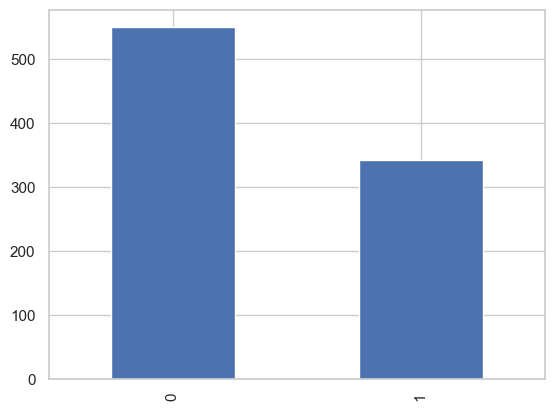

In [51]:
train['Survived'].value_counts().plot(kind='bar')

Здесь мы видим что Выжило меньше чем Не Выжило

In [8]:
pclass_Survived = pd.crosstab(train['Pclass'], train['Survived'])
pclass_Survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Здесь мы видим что в первом классе Выжило быльше чем Не Выжило,
во втором классе Выжило почти столько же сколько Не Выжило,
в третьем классе Выжило в три раза меньше чем Не Выжило,
теория : быть бедным - вредно для жизни.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

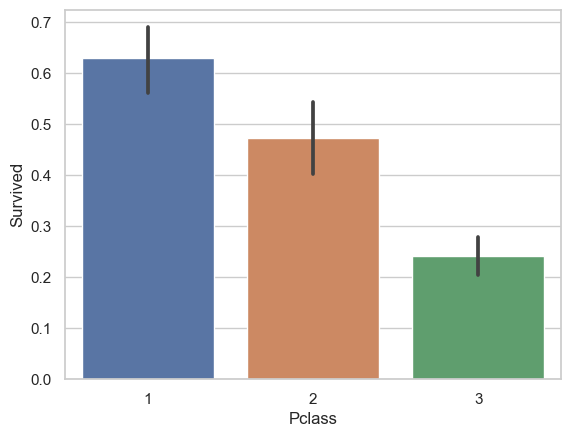

In [9]:
sns.barplot(x='Pclass' , y='Survived', data = train)

In [10]:
теория подтверждается

SyntaxError: invalid syntax (2057540213.py, line 1)

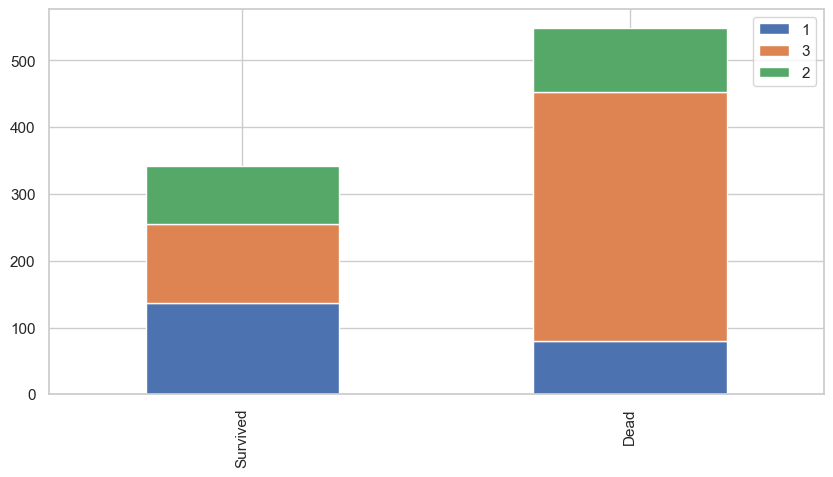

In [11]:
bar_chart('Pclass')

In [12]:
pclass_Sex = pd.crosstab(train['Fare'], train['Sex'])
pclass_Sex

Sex,female,male
Fare,,
0.0000,0,15
4.0125,0,1
5.0000,0,1
6.2375,0,1
6.4375,0,1
...,...,...
227.5250,3,1
247.5208,1,1
262.3750,2,0


In [13]:
train.pivot_table('Survived',index='Sex',columns='Pclass')


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


замечено - женщинам опускают статистику бедные,богатые и зажиточные женщины ценят свою жизнь почти одинаково высоко,
мужчинам поднимают статисику богатые,зажиточные и бедные мужчины почти одинаково не ценят свою жизнь.

<AxesSubplot:xlabel='Sex'>

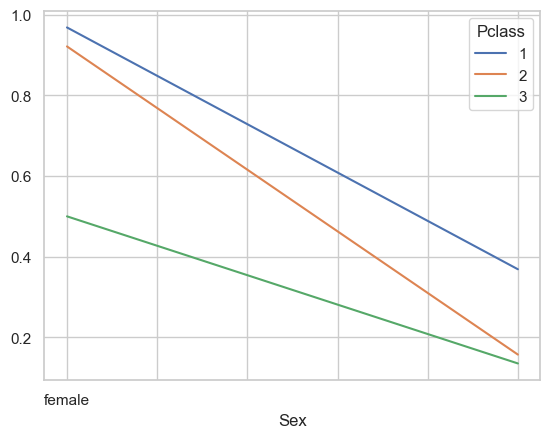

In [14]:
train.pivot_table('Survived',index='Sex',columns='Pclass').plot()


вывод - богатые и бедные вне зависимости от пола более консервативны в представление о ценности своей жизни, зажиточные женщины стремятся действовать как богатые,а зажиточные мужчины как бедные.

In [15]:
sexes = sorted(train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [16]:

train['Sex_Val'] = train['Sex'].map(genders_mapping).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [17]:
sex_val_xt = pd.crosstab(train['Sex_Val'], train['Survived'])
sex_val_xt

Survived,0,1
Sex_Val,,
0,81,233
1,468,109


<AxesSubplot:xlabel='Sex', ylabel='count'>

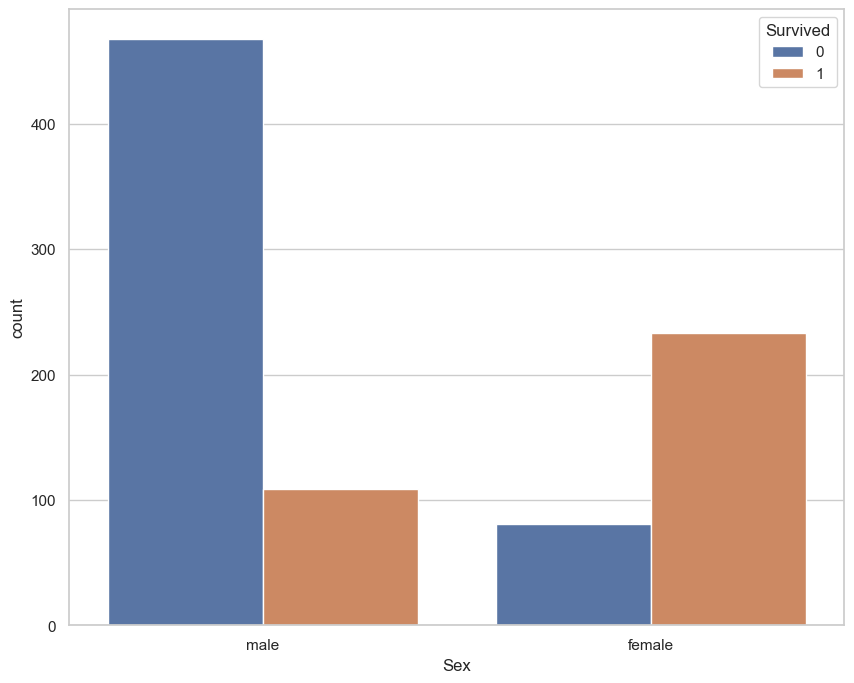

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x=train.Sex, hue=train.Survived, dodge=True)

In [19]:
вывод : женщин выжило в два раза больше чем мужчин,
    мужчин не выжило в пять раз больше чем женщин.

SyntaxError: invalid syntax (4163678446.py, line 1)

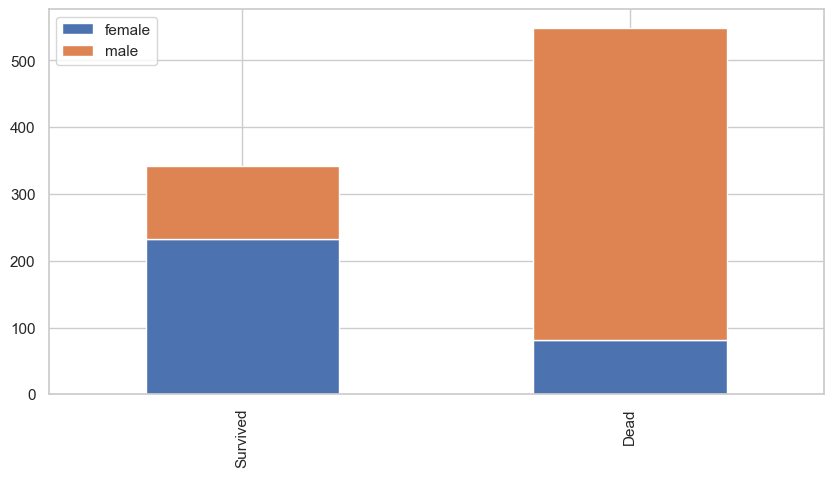

In [20]:
bar_chart('Sex')

In [21]:
passenger_classes = sorted(train['Pclass'].unique())

for p_class in passenger_classes:
    print( 'M: ', p_class, len(train[(train['Sex'] == 'male') & 
                             (train['Pclass'] == p_class)]))
    print( 'F: ', p_class, len(train[(train['Sex'] == 'female') & 
                             (train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


вывод : в первом и втором классах близкое количество людей с похожим  распределение полов,в третьем классе в полтора больше женщин чем в других и мужчин в три раза больше.

In [22]:
train['AgeFill'] = train['Age']
train['AgeFill'] = train['AgeFill'] \
                        .groupby([train['Sex_Val'], train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [23]:

len(train[train['AgeFill'].isnull()])

0

In [24]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

<AxesSubplot:>

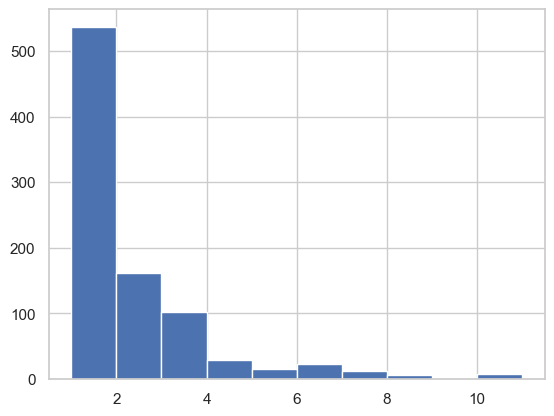

In [25]:

train['FamilySize'].hist()

In [26]:
вывод: большинство людей ехало без семьи

SyntaxError: invalid syntax (3443901714.py, line 1)

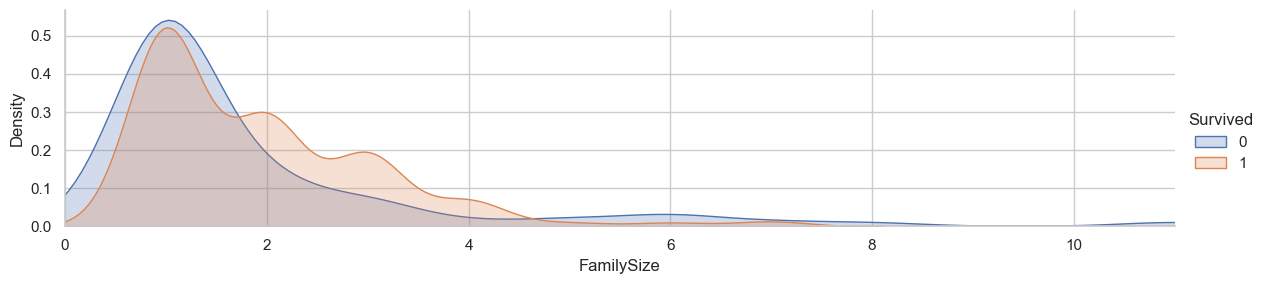

In [27]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()


вывод : семейному человеку легче выжить если у него на борту 3 или меньше родственников,далее выжить легче одиночке

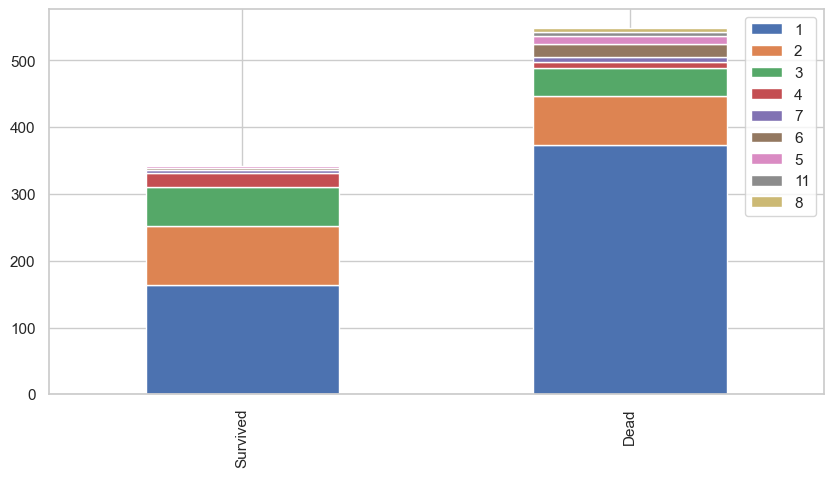

In [33]:
bar_chart('FamilySize')


In [28]:
pd.crosstab(train['Survived'], train['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [29]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,AgeFill,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,38.0,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,62.0,1


<AxesSubplot:>

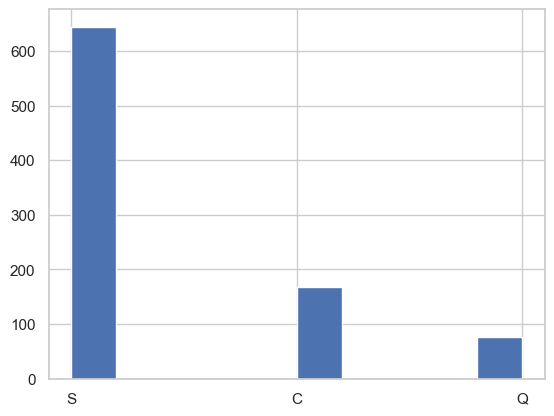

In [30]:
train['Embarked'].hist()

In [31]:
train_test = [train]

for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [32]:
len(train[train['Embarked'].isnull()])

0

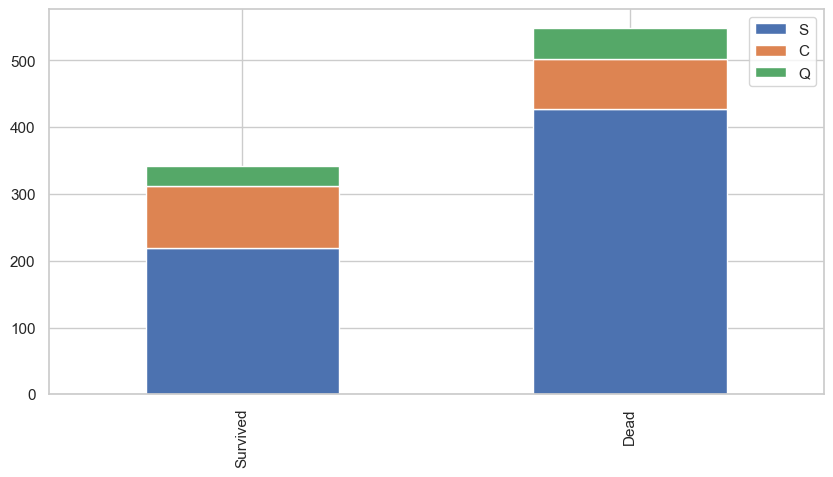

In [35]:
bar_chart('Embarked')


In [36]:
train_test = [train]

for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [37]:
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [44]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


здесь мы можем увидеть что:
    Капитан следует букве морского закона,
    Остальные высокие чины и доктора имеют половинные шансы на виживание,
    в мужской части присутсвуют две аномалии,
    это Мастера - так обращались к несовершеннолетним благородным мужчинам,
    в итоге присоединяя их к общностям "женщины и дети",
    и Переподобные , которые отправились всей группой на встречу с Начальником.
    в женской части что быть замужней дамой более благополучно для выживания 
    чем незамужней (55/127)>(26/99) на 0.17 ,без учёта неанглоязычных дам      
    которые ещё сильнее сдвигают статистику в свою пользу.
    

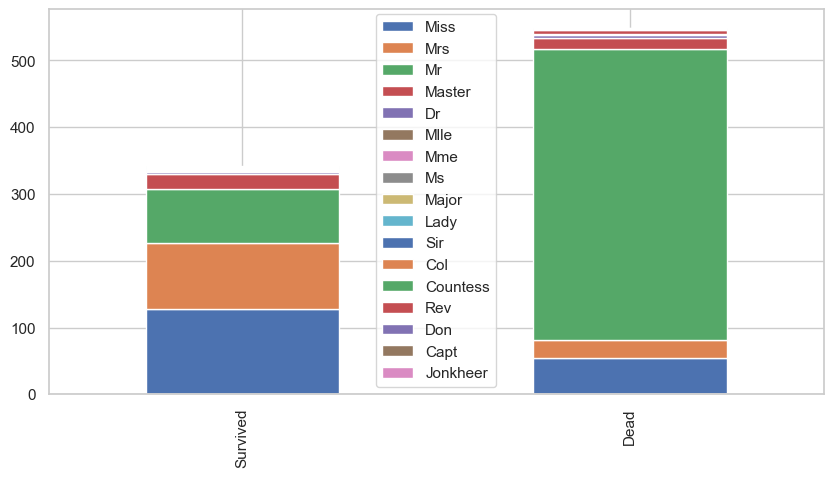

In [39]:
bar_chart('Title')


In [40]:
train_test = [train]

for dataset in train_test:
    dataset['TicketNo'] = dataset['Ticket'].str.split(' ([0-9]+)\.', expand=False)

In [41]:
for dataset in train_test:
    dataset['TicketN'] = dataset['Ticket'].str.extract(' ([0-9]+)', expand=False)

In [45]:
for dataset in train_test:
    dataset['TicketN'] = dataset['Ticket'].fillna('Ticket')
    

Тут я пытался выделить номер билета из билета , но по неясным причинам функция заполнения пустых полей переписывала непустые,а обращатся к полю как к списку не помогало, 
так же не получилось свести возрасты и цены в малому разнообразию значений чтобы на выдаче получалось информативно

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,AgeFill,FamilySize,Title,TicketNo,TicketN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,2,Mr,[A/5 21171],A/5 21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,2,Mrs,[PC 17599],PC 17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,1,Miss,[STON/O2. 3101282],STON/O2. 3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,2,Mrs,[113803],113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,1,Mr,[373450],373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,27.0,1,Rev,[211536],211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,19.0,1,Miss,[112053],112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,21.5,4,Miss,[W./C. 6607],W./C. 6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,26.0,1,Mr,[111369],111369


In [49]:
age = pd.cut(train['Age'],[0,18,80])
train.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663